In [101]:
# import necessary packages
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

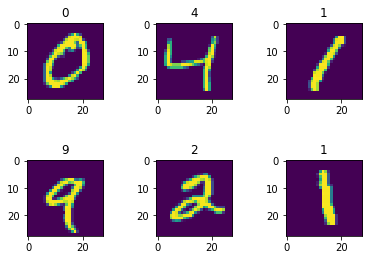

In [102]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load dataset
x_train=x_train/255.
x_test=x_test/255.
# show samples of the dataset
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [103]:
# more data exploration
print('trainig tensor shape {}'.format(x_train.shape))
print('Test data shape {}'.format(x_test.shape))
print('label tensor shape {} '.format(y_train.shape))

trainig tensor shape (60000, 28, 28)
Test data shape (10000, 28, 28)
label tensor shape (60000,) 


In [104]:
# data preprocessing 

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert y to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [105]:
# build the network
# create model
model = Sequential()

model.add(Dense(image_vector_size/2,
                input_shape=x_train[0].shape,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(image_vector_size/4,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(num_classes,
                kernel_initializer='normal',
                activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_42 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
EPOCHES=5
BATCH_SIZE=32
history=model.fit(x_train, y_train,
                  validation_data=(x_test, y_test), 
                  epochs=EPOCHES, 
                  batch_size=BATCH_SIZE,
                  verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 303us/step - loss: 0.7156 - acc: 0.8243 - val_loss: 0.3374 - val_acc: 0.9000
Epoch 2/5
60000/60000 [==============================] - 18s 294us/step - loss: 0.3106 - acc: 0.9104 - val_loss: 0.2675 - val_acc: 0.9251
Epoch 3/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.2546 - acc: 0.9262 - val_loss: 0.2242 - val_acc: 0.9356
Epoch 4/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.2183 - acc: 0.9373 - val_loss: 0.1970 - val_acc: 0.9424
Epoch 5/5
60000/60000 [==============================] - 16s 262us/step - loss: 0.1898 - acc: 0.9456 - val_loss: 0.1807 - val_acc: 0.9454


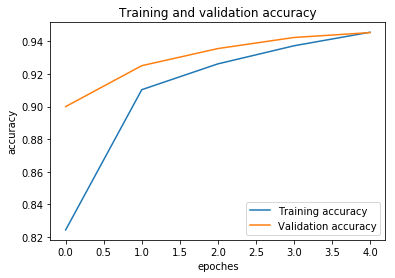

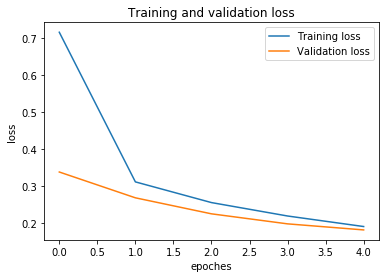

In [107]:
# Visualize loss and accuracy
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

In [108]:
# model evaluation
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 0.18065458681806923)
('Test accuracy:', 0.9454)
